## Toronto Data Analysis

In [41]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

In [42]:
# Read the Mapbox API key

load_dotenv()
map_box_api = os.getenv("mapbox") 

In [43]:
# Read the census data into a Pandas DataFrame

file_path = Path("06-PyViz_Unit 6 Homework_Starter_Code_Data_toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [44]:
# Calculate the sum number of dwelling types units per year 
groupby_to_data = to_data.groupby(to_data.index).sum()
groupby_to_data.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [45]:
groupby_to_data.to_csv("dwelling_type_per_year.csv")

In [ ]:
# Helper create_bar_chart function

<AxesSubplot:>

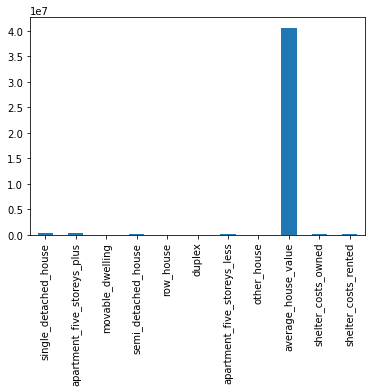

In [77]:
# Create a bar chart per year to show the number of dwelling types


groupby_to_data.loc[2001].plot.bar() 

## Average Monthly Shelter Costs in Toronto Per Year

In [52]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthy_shelter = to_data.groupby(to_data.index).mean()[['shelter_costs_owned', 'shelter_costs_rented']]
avg_monthy_shelter

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


<AxesSubplot:title={'center':'shelter costs owned'}, xlabel='year'>

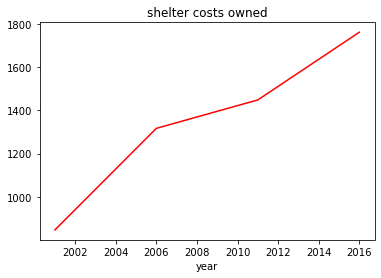

In [82]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year


avg_monthy_shelter['shelter_costs_owned'].plot.line(color='red', title='shelter costs owned')

<AxesSubplot:xlabel='year'>

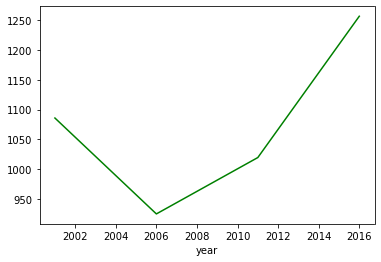

In [57]:
avg_monthy_shelter['shelter_costs_rented'].plot.line(color='green')

## Average House Value per Year

In [58]:
# Calculate the average house value per year
avg_house_value = to_data.groupby(to_data.index).mean()[['average_house_value']]
avg_house_value

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


<AxesSubplot:title={'center':'Average house value per year'}, xlabel='year'>

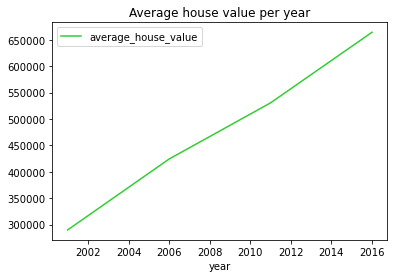

In [83]:
# Plot the average house value per year as a line chart

avg_house_value.plot(color='limegreen', title='Average house value per year')


## Number of Dwelling Types per Year

In [66]:
number_dwelling_type = to_data.groupby([to_data.index,'neighbourhood']).mean()[['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling',
                                                              'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]
number_dwelling_type.reset_index(inplace=True)
number_dwelling_type.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [67]:
number_dwelling_type.columns

Index(['year', 'neighbourhood', 'single_detached_house',
       'apartment_five_storeys_plus', 'movable_dwelling',
       'semi_detached_house', 'row_house', 'duplex',
       'apartment_five_storeys_less', 'other_house'],
      dtype='object')

In [72]:
number_dwelling_type.hvplot.bar(groupby='neighbourhood',x='year',rot=90, height=500)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

## The Top 10 Most Expensive Neighbourhoods

In [154]:
top_ten_most_expensive = to_data.sort_values('average_house_value',ascending = False).groupby('neighbourhood').head()
top_ten_most_expensive.reset_index(drop=True, inplace=True)
top_ten_most_expensive.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
1,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
2,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
3,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
4,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809


In [152]:
top_ten.hvplot.bar(x='neighbourhood', y='average_house_value', rot=90, height=500, title='Top 10 most expensive neighbourhood in Toronto')

:Bars   [neighbourhood]   (average_house_value)